# Regression

## Import all the crucial libraries

In [2]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')


## Import the dataset

In [3]:
data = pd.read_excel ("HW_Data_Set.xlsx")
df= data.copy()
df = df.dropna()
df.head()

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,...,ind_416,ind_418,ind_420,ind_422,ind_424,ind_426,ind_428,20_target,50_target,90_target
0,19,17,100.0,85.714286,14.285714,72.363515,60.808814,23.80,17.62,11.73,...,-49.6,-54,-152,-353,1.0,0.498547,0.701906,15.135802,35.625252,36.997753
1,24,19,100.0,78.571429,21.428571,74.275883,64.366798,11.45,18.16,12.22,...,-55.6,-60,-158,-359,1.0,0.537088,0.690833,15.143348,35.643013,37.016198
2,30,24,100.0,71.428571,28.571429,75.140402,65.915803,8.75,17.86,12.28,...,-58.4,-60,-160,-362,1.0,0.615169,0.693040,15.146870,35.651301,-37.024805
3,37,30,100.0,64.285714,35.714286,76.677846,68.584234,7.80,14.76,12.61,...,-61.8,-65,-166,-367,1.0,0.661517,0.673418,15.153283,0.000000,-37.040483
4,41,37,100.0,57.142857,42.857143,81.603007,76.455495,14.90,11.92,14.25,...,-79.8,-86,-186,-388,1.0,0.747204,0.700522,-15.179065,-35.727079,-37.103503


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ind_5,6167.0,-0.803146,23.624403,-131.000000,-14.000000,0.000000,13.000000,76.000000
ind_6,6167.0,-0.803470,23.624144,-131.000000,-14.000000,0.000000,13.000000,76.000000
ind_8,6167.0,48.388890,36.388526,0.000000,14.285714,50.000000,85.714286,100.000000
ind_9,6167.0,48.289282,36.478009,0.000000,14.285714,50.000000,85.714286,100.000000
ind_10,6167.0,0.099609,60.414625,-100.000000,-50.000000,0.000000,57.142857,100.000000
...,...,...,...,...,...,...,...,...
ind_426,6167.0,0.498188,0.228547,0.000000,0.323783,0.495192,0.675730,1.000000
ind_428,6167.0,0.490174,0.150483,0.083530,0.379894,0.487078,0.601508,0.868534
20_target,6167.0,-0.057102,14.834497,-15.780588,-15.350354,0.000000,15.385945,15.768767
50_target,6167.0,-2.906358,34.559778,-37.142889,-36.208094,-34.267756,35.879524,37.038694


## Identifying categorical data

In [5]:
df_categorical = df.select_dtypes(include=['object'])
df_categorical.head()

,ind_109,ind_420,ind_422
0,GREEN,-152,-353
1,GREEN,-158,-359
2,GREEN,-160,-362
3,GREEN,-166,-367
4,GREEN,-186,-388


In [6]:
# anlamlandırılamayan kategorik değişkenler
df_categorical["ind_420"].describe()

count     6167
unique     582
top          ?
freq      1041
Name: ind_420, dtype: object

In [7]:
# anlamlandırılamayan kategorik değişkenler
df_categorical["ind_422"].describe()

count     6167
unique     573
top          ?
freq      1041
Name: ind_422, dtype: object

## Exploration of Target

In [8]:
df.corr()["90_target"].abs().nlargest(10)

90_target    1.000000
50_target    0.940916
20_target    0.355950
ind_18       0.140877
ind_17       0.129277
ind_412      0.124265
ind_332      0.115002
ind_16       0.108077
ind_324      0.103707
ind_418      0.096903
Name: 90_target, dtype: float64

In [9]:
df.corr().iloc[:,130:133]

,20_target,50_target,90_target
ind_5,0.060969,0.068989,0.060428
ind_6,0.062101,0.069652,0.061560
ind_8,-0.004126,0.006984,-0.006650
ind_9,-0.031316,-0.004053,0.012093
ind_10,0.016423,0.006654,-0.011307
...,...,...,...
ind_426,0.019599,0.009063,-0.002519
ind_428,0.047041,0.052418,0.043563
20_target,1.000000,0.384076,0.355950
50_target,0.384076,1.000000,0.940916


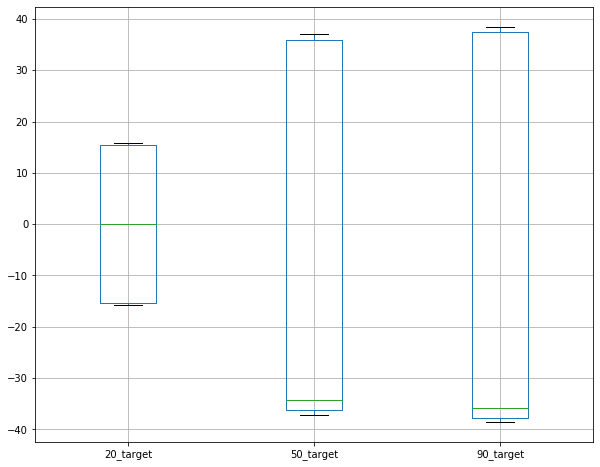

In [10]:
plt.figure(figsize=(10,8))
boxplot_df = data[["20_target", "50_target","90_target"]]
boxplot_df.boxplot()
plt.show()


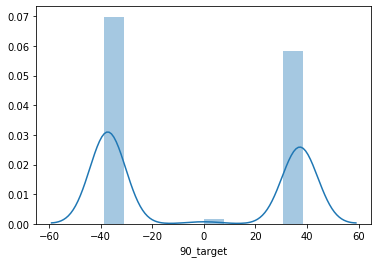

In [11]:
sns.distplot(df["90_target"]);

In [12]:
df["90_target"].describe()

count    6167.000000
mean       -3.315072
std        36.841541
min       -38.573858
25%       -37.695273
50%       -35.788391
75%        37.521892
max        38.465649
Name: 90_target, dtype: float64

In [13]:
df.corr()["50_target"].abs().nlargest(10)

50_target    1.000000
90_target    0.940916
20_target    0.384076
ind_412      0.127234
ind_18       0.127057
ind_17       0.121097
ind_324      0.110802
ind_332      0.104057
ind_16       0.101774
ind_418      0.101488
Name: 50_target, dtype: float64

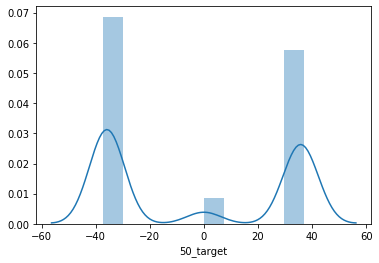

In [14]:
sns.distplot(df["50_target"]);

In [15]:
df.corr()["20_target"].abs().nlargest(10)

20_target    1.000000
50_target    0.384076
90_target    0.355950
ind_37       0.089695
ind_332      0.089679
ind_130      0.079174
ind_70       0.072131
ind_50       0.071823
ind_334      0.071096
ind_36       0.071003
Name: 20_target, dtype: float64

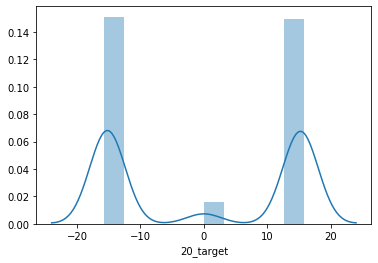

In [16]:
sns.distplot(df["20_target"]);

## Encoding the categorical data

In [17]:
df_encoded = pd.get_dummies(df, columns = ["ind_109"], prefix = ["new_"],drop_first=True)
df_encoded = df_encoded.drop(["ind_420","ind_422","20_target","50_target"],axis=1)
df_encoded.head()

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,...,ind_410,ind_412,ind_414,ind_416,ind_418,ind_424,ind_426,ind_428,90_target,new__RED
0,19,17,100.0,85.714286,14.285714,72.363515,60.808814,23.80,17.62,11.73,...,-27,0.002371,2.0,-49.6,-54,1.0,0.498547,0.701906,36.997753,0
1,24,19,100.0,78.571429,21.428571,74.275883,64.366798,11.45,18.16,12.22,...,-31,0.003074,0.8,-55.6,-60,1.0,0.537088,0.690833,37.016198,0
2,30,24,100.0,71.428571,28.571429,75.140402,65.915803,8.75,17.86,12.28,...,-30,0.003561,2.7,-58.4,-60,1.0,0.615169,0.693040,-37.024805,0
3,37,30,100.0,64.285714,35.714286,76.677846,68.584234,7.80,14.76,12.61,...,-30,0.004366,0.9,-61.8,-65,1.0,0.661517,0.673418,-37.040483,0
4,41,37,100.0,57.142857,42.857143,81.603007,76.455495,14.90,11.92,14.25,...,-45,0.004198,0.1,-79.8,-86,1.0,0.747204,0.700522,-37.103503,0


In [29]:
# kendi içlerinde korelasyon tablosuna baktık
df_encoded.corr().abs()

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,...,ind_410,ind_412,ind_414,ind_416,ind_418,ind_424,ind_426,ind_428,90_target,new__RED
ind_5,1.000000,0.989945,0.543246,0.533328,0.649225,0.822255,0.768234,0.014502,0.026336,0.041130,...,0.393843,0.620106,0.694619,0.304134,0.620099,0.076169,0.626439,0.817302,0.060428,0.105511
ind_6,0.989945,1.000000,0.514222,0.495572,0.608947,0.768551,0.713870,0.006066,0.019393,0.035795,...,0.280376,0.634679,0.646983,0.279922,0.569657,0.021220,0.567359,0.810371,0.061560,0.027591
ind_8,0.543246,0.514222,1.000000,0.374857,0.828650,0.583623,0.482220,0.162635,0.139612,0.038862,...,0.370345,0.275687,0.489596,0.277258,0.432579,0.144795,0.593799,0.445427,0.006650,0.177101
ind_9,0.533328,0.495572,0.374857,1.000000,0.829576,0.609288,0.568581,0.238938,0.240048,0.152133,...,0.426831,0.276882,0.436275,0.349318,0.505772,0.173139,0.631961,0.450719,0.012093,0.206484
ind_10,0.649225,0.608947,0.828650,0.829576,1.000000,0.719409,0.633753,0.046312,0.060849,0.068450,...,0.480781,0.333229,0.558311,0.377913,0.565931,0.191752,0.739227,0.540428,0.011307,0.231345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ind_424,0.076169,0.021220,0.144795,0.173139,0.191752,0.385101,0.354028,0.011056,0.010548,0.013790,...,0.515309,0.027318,0.269870,0.136217,0.293695,1.000000,0.341017,0.188853,0.007689,0.507821
ind_426,0.626439,0.567359,0.593799,0.631961,0.739227,0.776076,0.700736,0.066201,0.066437,0.051049,...,0.642797,0.293592,0.571432,0.356302,0.594243,0.341017,1.000000,0.584754,0.002519,0.307789
ind_428,0.817302,0.810371,0.445427,0.450719,0.540428,0.807595,0.727899,0.021970,0.016318,0.010361,...,0.392409,0.574646,0.499656,0.260048,0.487564,0.188853,0.584754,1.000000,0.043563,0.175658
90_target,0.060428,0.061560,0.006650,0.012093,0.011307,0.043786,0.043491,0.077710,0.088271,0.108077,...,0.021083,0.124265,0.018379,0.049615,0.096903,0.007689,0.002519,0.043563,1.000000,0.019559


In [30]:
df_encoded.corr()["90_target"].abs().nlargest(10)

90_target    1.000000
ind_18       0.140877
ind_17       0.129277
ind_412      0.124265
ind_332      0.115002
ind_16       0.108077
ind_324      0.103707
ind_418      0.096903
ind_330      0.093811
ind_15       0.088271
Name: 90_target, dtype: float64

In [31]:
columns= []

for column in df_encoded.columns:
    columns.append(column)
print(columns)
print(type(columns))

['ind_5', 'ind_6', 'ind_8', 'ind_9', 'ind_10', 'ind_12', 'ind_13', 'ind_14', 'ind_15', 'ind_16', 'ind_17', 'ind_18', 'ind_19', 'ind_20', 'ind_21', 'ind_22', 'ind_23', 'ind_25', 'ind_26', 'ind_27', 'ind_28', 'ind_29', 'ind_30', 'ind_31', 'ind_32', 'ind_33', 'ind_34', 'ind_35', 'ind_36', 'ind_37', 'ind_39', 'ind_40', 'ind_41', 'ind_42', 'ind_43', 'ind_44', 'ind_45', 'ind_46', 'ind_47', 'ind_48', 'ind_49', 'ind_50', 'ind_51', 'ind_52', 'ind_53', 'ind_56', 'ind_58', 'ind_61', 'ind_62', 'ind_65', 'ind_67', 'ind_70', 'ind_71', 'ind_74', 'ind_77', 'ind_82', 'ind_83', 'ind_88', 'ind_92', 'ind_102', 'ind_116', 'ind_118', 'ind_122', 'ind_124', 'ind_128', 'ind_130', 'ind_132', 'ind_134', 'ind_136', 'ind_139', 'ind_142', 'ind_145', 'ind_147', 'ind_150', 'ind_153', 'ind_156', 'ind_164', 'ind_168', 'ind_172', 'ind_176', 'ind_179', 'ind_181', 'ind_188', 'ind_194', 'ind_212', 'ind_217', 'ind_225', 'ind_228', 'ind_234', 'ind_237', 'ind_239', 'ind_241', 'ind_243', 'ind_309', 'ind_310', 'ind_311', 'ind_3

In [32]:
df_scaled = preprocessing.scale(df_encoded)
df_scaled = pd.DataFrame(data=df_scaled, columns=columns)
df_scaled.head()

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,...,ind_410,ind_412,ind_414,ind_416,ind_418,ind_424,ind_426,ind_428,90_target,new__RED
0,0.838318,0.753674,1.41845,1.026044,0.234831,1.875320,1.161562,1.768003,1.010514,-0.008731,...,-1.779355,0.379478,-1.008149,-2.549585,-1.110172,1.198341,0.001568,1.407132,1.094311,-0.984393
1,1.049980,0.838340,1.41845,0.830215,0.353072,2.032100,1.213674,-0.047253,1.103849,0.089859,...,-2.040641,0.503689,-1.053751,-2.922284,-1.368019,1.198341,0.170218,1.333540,1.094811,-0.984393
2,1.303976,1.050005,1.41845,0.634387,0.471312,2.102976,1.236362,-0.444111,1.051996,0.101931,...,-1.975319,0.589731,-0.981548,-3.096210,-1.368019,1.198341,0.511884,1.348207,-0.915067,-0.984393
3,1.600303,1.304004,1.41845,0.438558,0.589552,2.229019,1.275445,-0.583746,0.516185,0.168328,...,-1.975319,0.731935,-1.049951,-3.307406,-1.582891,1.198341,0.714696,1.217802,-0.915492,-0.984393
4,1.769634,1.600335,1.41845,0.242730,0.707792,2.632796,1.390732,0.459843,0.025313,0.498302,...,-2.955141,0.702224,-1.080352,-4.425503,-2.485355,1.198341,1.089645,1.397934,-0.917203,-0.984393


In [33]:
# VIF ile değişkenlerin anlamlı olma durumlarına baktım
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [34]:
vif = calc_vif(df_scaled)
vif_value=vif["VIF"]
vif_value

0      1901.034549
1      1239.813703
2              inf
3              inf
4              inf
          ...     
127       3.636374
128       8.327488
129      11.307395
130       1.210346
131       3.239347
Name: VIF, Length: 132, dtype: float64

In [35]:
vif_df=pd.DataFrame(vif.nsmallest(40,"VIF"))
vif_df

,variables,VIF
130,90_target,1.210346
85,ind_217,1.479870
125,ind_416,1.569714
107,ind_340,1.724569
94,ind_310,1.950331
93,ind_309,1.998077
87,ind_228,2.169581
57,ind_88,2.244511
90,ind_239,2.428334
123,ind_412,2.432931


In [36]:
df_min_vif = vif_df["variables"].iloc[0:40]
df_vif= df_scaled[df_min_vif]
df_vif.head()

,90_target,ind_217,ind_416,ind_340,ind_310,ind_309,ind_228,ind_88,ind_239,ind_412,...,ind_338,ind_349,ind_53,ind_134,ind_426,ind_15,ind_62,ind_71,ind_65,ind_56
0,1.094311,0.011794,-2.549585,-3.428001,-2.506340,0.282385,-0.015921,0.911926,1.026246,0.379478,...,2.867689,0.04654,1.461789,0.769279,0.001568,1.010514,0.830714,0.752724,0.797419,1.378102
1,1.094811,0.011794,-2.922284,-3.426210,-2.504613,0.282385,-0.016811,0.707253,1.026246,0.503689,...,2.867932,0.04654,1.219760,0.642158,0.170218,1.103849,0.830714,0.752724,0.797419,1.450697
2,-0.915067,0.011794,-3.096210,-3.425375,-2.503807,0.282385,-0.017701,0.691373,1.026246,0.589731,...,2.868175,0.04654,1.038238,0.642158,0.511884,1.051996,0.913328,0.752724,0.881398,1.378102
3,-0.915492,0.011794,-3.307406,-3.423855,-2.502340,0.282385,-0.018592,0.484935,1.026246,0.731935,...,2.868418,0.04654,0.856717,0.387917,0.714696,0.516185,0.913328,0.752724,0.881398,1.232913
4,-0.917203,1.065893,-4.425503,-3.417756,-2.496457,0.282385,-0.019482,2.900280,1.026246,0.702224,...,2.868660,0.04654,1.703818,2.548967,1.089645,0.025313,0.995943,0.837716,0.965378,1.450697


In [39]:
y = df_vif["90_target"]
X = df_vif.drop(["90_target"], axis = 1).astype("float64")
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=42)

## KNN  Regreson

In [41]:
y = df_vif["90_target"]
X = df_vif.drop(["90_target"], axis = 1).astype("float64")
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [42]:
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor().fit(X_train, y_train)


In [43]:
knn_model

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [44]:
knn_model.n_neighbors


5

In [45]:
knn_model.effective_metric_

'euclidean'

## KNN 

In [46]:
y_pred = knn_model.predict(X_test)


In [47]:
np.sqrt(mean_squared_error(y_test, y_pred))


0.7366650552029558

In [48]:
RMSE = [] 

for k in range(10):
    k = k+1
    knn_model = KNeighborsRegressor(n_neighbors = k).fit(X_train, y_train)
    y_pred = knn_model.predict(X_train) 
    rmse = np.sqrt(mean_squared_error(y_train,y_pred)) 
    RMSE.append(rmse) 
    print("k =" , k , "için RMSE değeri: ", rmse)



k = 1 için RMSE değeri:  0.0
k = 2 için RMSE değeri:  0.3789180794123972
k = 3 için RMSE değeri:  0.4527516135336871
k = 4 için RMSE değeri:  0.5198325072826819
k = 5 için RMSE değeri:  0.5644800118075269
k = 6 için RMSE değeri:  0.6021190309804357
k = 7 için RMSE değeri:  0.6314915873096689
k = 8 için RMSE değeri:  0.6568141455234218
k = 9 için RMSE değeri:  0.6753594464623611
k = 10 için RMSE değeri:  0.6922913714908342


## KNN  - Model Tuning

In [51]:
knn_model

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                    weights='uniform')

In [52]:
?knn_model

In [53]:
from sklearn.model_selection import GridSearchCV


In [57]:
knn_params = {'n_neighbors': np.arange(1,30,1),
             'algorithm': (['auto', 'ball_tree', 'kd_tree', 'brute'])}


In [58]:
knn = KNeighborsRegressor()

In [59]:
knn_cv_model = GridSearchCV(knn, knn_params, cv = 10)


In [60]:
knn_cv_model.fit(X_train, y_train)


GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [61]:
knn_cv_model.best_params_


{'algorithm': 'auto', 'n_neighbors': 2}

In [62]:
RMSE = [] 
RMSE_CV = []
for k in range(10):
    k = k+1
    knn_model = KNeighborsRegressor(n_neighbors = k).fit(X_train, y_train)
    y_pred = knn_model.predict(X_train) 
    rmse = np.sqrt(mean_squared_error(y_train,y_pred)) 
    rmse_cv = np.sqrt(-1*cross_val_score(knn_model, X_train, y_train, cv=10, 
                                         scoring = "neg_mean_squared_error").mean())
    RMSE.append(rmse) 
    RMSE_CV.append(rmse_cv)
    print("k =" , k , "için RMSE değeri: ", rmse, "RMSE_CV değeri: ", rmse_cv )


k = 1 için RMSE değeri:  0.0 RMSE_CV değeri:  0.7775546352412605
k = 2 için RMSE değeri:  0.3789180794123972 RMSE_CV değeri:  0.7035535886145295
k = 3 için RMSE değeri:  0.4527516135336871 RMSE_CV değeri:  0.7114920273895998
k = 4 için RMSE değeri:  0.5198325072826819 RMSE_CV değeri:  0.7281101490666216
k = 5 için RMSE değeri:  0.5644800118075269 RMSE_CV değeri:  0.7406865846246895
k = 6 için RMSE değeri:  0.6021190309804357 RMSE_CV değeri:  0.7557015717234025
k = 7 için RMSE değeri:  0.6314915873096689 RMSE_CV değeri:  0.7675904335442143
k = 8 için RMSE değeri:  0.6568141455234218 RMSE_CV değeri:  0.7771230635946555
k = 9 için RMSE değeri:  0.6753594464623611 RMSE_CV değeri:  0.787901611364985
k = 10 için RMSE değeri:  0.6922913714908342 RMSE_CV değeri:  0.7985872705956708


In [63]:
knn_tuned = KNeighborsRegressor(n_neighbors = knn_cv_model.best_params_["n_neighbors"])


In [64]:
knn_tuned.fit(X_train, y_train)


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                    weights='uniform')

In [65]:
np.sqrt(mean_squared_error(y_test, knn_tuned.predict(X_test)))


0.7487203060721123

In [66]:
r2_score(y_test, knn_tuned.predict(X_test))


0.4371480280491359

# SVM (Support Vector Machines)

In [67]:
y = df_vif["90_target"]
X = df_vif.drop(["90_target"], axis = 1).astype("float64")
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [68]:
from sklearn.svm import SVR


In [69]:
svr_model = SVR("linear").fit(X_train, y_train)


In [70]:
svr_model.predict(X_train)[0:5]


array([-0.06897079, -0.70995721, -0.7195436 , -0.68729536,  0.72448385])

In [71]:
y_pred = svr_model.predict(X_test)


In [72]:
np.sqrt(mean_squared_error(y_test, y_pred))


1.0731063043338924

In [73]:
r2_score(y_test, y_pred)

-0.15621995614171302

## SVR- Model Tuning

In [74]:
svr_model


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [75]:
?svr_model

In [78]:
svr_params = {"C": np.arange(1,6),
             "kernel": (['linear','poly','rbf'])}#0.1 den 2 ye kadar 0.1 artarak denemeye girilcek değerler
svr_cv_model = GridSearchCV(svr_model, svr_params,
                            cv = 10,
                            n_jobs=-1,
                           verbose=2).fit(X_train,y_train)


Fitting 10 folds for each of 15 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  7.4min finished


In [79]:
pd.Series(svr_cv_model.best_params_)


C           5
kernel    rbf
dtype: object

In [80]:
svr_tuned = SVR(kernel = "rbf", 
                C = 5).fit(X_train, y_train)


In [81]:
y_pred = svr_tuned.predict(X_test)

In [82]:
np.sqrt(mean_squared_error(y_test, y_pred))


0.7086270046978644

In [83]:
np.sqrt(mean_squared_error(y_test, y_pred))


0.7086270046978644

In [84]:
r2_score(y_test, y_pred)

0.49581448367290315

# Neural Network 

In [85]:
y = df_vif["90_target"]
X = df_vif.drop(["90_target"], axis = 1).astype("float64")
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [86]:
from sklearn.preprocessing import StandardScaler


In [87]:
scaler = StandardScaler()
scaler.fit(X_train)
 

StandardScaler(copy=True, with_mean=True, with_std=True)

In [88]:
X_train_scaled = scaler.transform(X_train)


In [89]:
X_test_scaled = scaler.transform(X_test)


In [90]:
from sklearn.neural_network import MLPRegressor


In [91]:
mlp_model = MLPRegressor().fit(X_train_scaled, y_train)
mlp_model


MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100,), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=200,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [92]:
mlp_model = MLPRegressor(hidden_layer_sizes = (100,20)).fit(X_train_scaled, y_train)


In [93]:
mlp_model

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100, 20), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=200,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [94]:
mlp_model.n_layers_

4

In [161]:
mlp_model.hidden_layer_sizes


(100, 20)

In [95]:
y_pred = mlp_model.predict(X_test_scaled)



In [96]:
np.sqrt(mean_squared_error(y_test, y_pred))


0.7684770070513378

## Neural Network - Model Tuning

In [97]:
mlp_model


MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100, 20), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=200,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [98]:
?mlp_model

In [99]:
mlp_params = {'alpha': [0.1, 0.01,0.02,0.005],
             'hidden_layer_sizes': [(20,20),(100,50,150),(300,200,150)],
             'activation': ['relu','logistic','identity','tanh'],
             'solver': ['lbfgs', 'sgd', 'adam']}


In [100]:
mlp_cv_model = GridSearchCV(mlp_model, mlp_params,
                            cv = 10,
                            n_jobs=-1,
                            verbose=2)


In [101]:
mlp_cv_model.fit(X_train_scaled, y_train)


Fitting 10 folds for each of 144 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 19.6min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed: 63.2min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed: 101.9min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed: 125.5min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed: 226.8min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=MLPRegressor(activation='relu', alpha=0.0001,
                                    batch_size='auto', beta_1=0.9, beta_2=0.999,
                                    early_stopping=False, epsilon=1e-08,
                                    hidden_layer_sizes=(100, 20),
                                    learning_rate='constant',
                                    learning_rate_init=0.001, max_fun=15000,
                                    max_iter=200, momentum=0.9,
                                    n_iter_no_change=10,
                                    nesterovs_momentum=True, power_t=0.5,
                                    random_sta...
                                    validation_fraction=0.1, verbose=False,
                                    warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'activation': ['relu', 'logistic', 'identity', 'tanh'],
                         'alpha': [0

In [103]:
mlp_cv_model.best_params_


{'activation': 'tanh',
 'alpha': 0.1,
 'hidden_layer_sizes': (300, 200, 150),
 'solver': 'adam'}

In [104]:
mlp_tuned = MLPRegressor(alpha = 0.01, 
                         hidden_layer_sizes = (300,200,150),
                         activation = 'tanh',
                         solver= 'adam'
                        )


In [105]:
mlp_tuned.fit(X_train_scaled, y_train)


MLPRegressor(activation='tanh', alpha=0.01, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(300, 200, 150), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=200,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [106]:
y_pred = mlp_tuned.predict(X_test_scaled)


In [107]:
np.sqrt(mean_squared_error(y_test, y_pred))


0.6274679769481111

In [108]:
r2_score(y_test, y_pred)

0.6046897265648468

#  CART

In [195]:
y = df_vif["90_target"]
X = df_vif.drop(["90_target"], axis = 1).astype("float64")
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [196]:
cart_model = DecisionTreeRegressor()

In [197]:
cart_model.fit(X_train, y_train)


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [198]:
pip install skompiler[full]

Note: you may need to restart the kernel to use updated packages.


In [199]:
from skompiler import skompile

In [200]:

print(skompile(cart_model.predict).to('python/code'))

((((((((((1.0539549458190043 if x[10] <= -1.4443475008010864 else (
    -0.8763715050018221 if x[34] <= 0.8169306814670563 else 
    -0.8749194979667909) if x[36] <= -1.0745872259140015 else 
    -0.8793255882191457 if x[36] <= -0.9471003711223602 else 
    -0.8801162644021729) if x[10] <= -1.4347136616706848 else 
    -0.8956954369596953 if x[37] <= -1.2600828409194946 else (
    1.0723637238760313 if x[5] <= 0.15584177523851395 else 
    -0.8957482879298398) if x[1] <= -2.3011187314987183 else (
    1.066806042060365 if x[3] <= 0.7297804653644562 else 1.0631543279463647 if
    x[25] <= 0.6764892637729645 else 1.062007743103236) if x[10] <= 
    -0.541448712348938 else (1.0708755559033067 if x[4] <= 
    -4.325933814048767 else 1.072032015487005) if x[8] <= 
    -0.6350810527801514 else (1.0746961145368232 if x[3] <= 
    0.7347830533981323 else 1.073698902765059) if x[32] <= 
    -0.43836715817451477 else 1.0720716535110226 if x[32] <= 
    -0.18412596359848976 else 1.072964554321803

In [201]:
y_pred =cart_model.predict(X_test)


In [202]:
np.sqrt(mean_squared_error(y_test, y_pred))


0.6238511812431873

## CART- Model Tuning

In [203]:
cart_model = DecisionTreeRegressor()
cart_model.fit(X_train, y_train)
y_pred = cart_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))


0.6241826837132527

In [204]:
cart_model = DecisionTreeRegressor(max_leaf_nodes=15)
cart_model.fit(X_train, y_train)
y_pred = cart_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))



0.8654787275800525

In [205]:
cart_model = DecisionTreeRegressor(max_leaf_nodes=15,min_samples_split=15)
cart_model.fit(X_train, y_train)
y_pred = cart_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))



0.8654787275800525

In [206]:
cart_model = DecisionTreeRegressor(max_leaf_nodes=10,min_samples_split=10)
cart_model.fit(X_train, y_train)
y_pred = cart_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))


0.9101879906721281

In [122]:
cart_model

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=15,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=15,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [123]:
?cart_model

In [220]:
cart_params = {"min_samples_split": range(2,100),
               "max_leaf_nodes": range(2,10)}


In [221]:
cart_cv_model = GridSearchCV(cart_model, cart_params,
                             cv = 10,
                             n_jobs=-1,
                            verbose=2)


In [222]:
cart_cv_model.fit(X_train, y_train)


Fitting 10 folds for each of 784 candidates, totalling 7840 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 504 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 1316 tasks      | elapsed:   16.6s
[Parallel(n_jobs=-1)]: Done 2448 tasks      | elapsed:   31.0s
[Parallel(n_jobs=-1)]: Done 3908 tasks      | elapsed:   51.7s
[Parallel(n_jobs=-1)]: Done 5688 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 7796 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 7840 out of 7840 | elapsed:  1.9min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=10,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=10,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_leaf_nodes': range(2, 10),
                         'min_samples_split': range(2, 100)},
             pre_dispatch='2*n_jobs', 

In [223]:
cart_cv_model.best_params_


{'max_leaf_nodes': 9, 'min_samples_split': 20}

In [224]:
cart_tuned = DecisionTreeRegressor(max_leaf_nodes = 9, min_samples_split = 20)


In [225]:
cart_tuned.fit(X_train, y_train)


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=9,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=20,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [226]:
y_pred = cart_tuned.predict(X_test)


In [227]:
np.sqrt(mean_squared_error(y_test, y_pred))


0.9229984000232093

# Random Forests

In [127]:
y = df_vif["90_target"]
X = df_vif.drop(["90_target"], axis = 1).astype("float64")
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [128]:
from sklearn.ensemble import RandomForestRegressor


In [129]:
rf_model = RandomForestRegressor(random_state = 42)


In [130]:
rf_model.fit(X_train, y_train)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

## Random Forests

In [131]:
y_pred = rf_model.predict(X_test)


In [132]:
np.sqrt(mean_squared_error(y_test, y_pred))


0.44684183422303125

## Random Forests- Model Tuning

In [134]:
rf_model

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [135]:
?rf_model

In [136]:
rf_params = {'max_depth': list(range(1,10)),
            'max_features': [3,5,10,15],
            'n_estimators' : [100, 200, 500, 1000, 2000]}


In [137]:
rf_model = RandomForestRegressor(random_state = 42)


In [138]:
rf_cv_model = GridSearchCV(rf_model, 
                           rf_params, 
                           cv = 10, 
                            n_jobs = -1)


In [139]:
rf_cv_model.fit(X_train, y_train)


GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_job

In [140]:
rf_cv_model.best_params_


{'max_depth': 9, 'max_features': 15, 'n_estimators': 2000}

In [141]:
rf_tuned = RandomForestRegressor(max_depth  = 9, 
                                 max_features = 15, 
                                 n_estimators =2000)


In [142]:
rf_tuned.fit(X_train, y_train)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=9, max_features=15, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=2000, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [143]:
y_pred = rf_tuned.predict(X_test)


In [144]:
np.sqrt(mean_squared_error(y_test, y_pred))


0.5792340259231049

In [145]:
Importance = pd.DataFrame({"Importance": rf_tuned.feature_importances_*100},
                         index = X_train.columns)


Text(0.5, 0, 'Değişken Önem Düzeyleri')

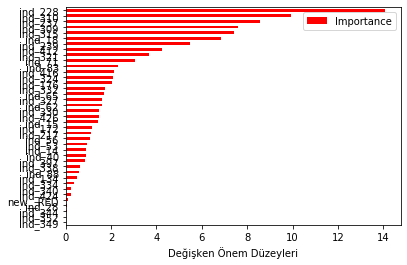

In [150]:

Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Değişken Önem Düzeyleri")


# XGBoost - eXtreme Gradient Boosting


In [164]:
y = df_vif["90_target"]
X = df_vif.drop(["90_target"], axis = 1).astype("float64")
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [165]:
import xgboost as xgb


In [166]:
from xgboost import XGBRegressor


In [167]:
xgb_model = XGBRegressor().fit(X_train, y_train)


In [168]:
y_pred = xgb_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))


0.4520030973464557

## XGBoost- Tuning

In [169]:
xgb_model

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [170]:
?xgb_model

In [246]:
xgb_grid = {
     'colsample_bytree': [0.5,0.6,0.9,1], 
     'n_estimators':[100, 200, 500, 1000],
     'max_depth': [2,3,4,5],
     'learning_rate': [0.1, 0.01, 0.5]
}


In [247]:
xgb = XGBRegressor()

xgb_cv = GridSearchCV(xgb, 
                      param_grid = xgb_grid, 
                      cv = 10, 
                      n_jobs = -1,
                      verbose = 2)


xgb_cv.fit(X_train, y_train)


Fitting 10 folds for each of 300 candidates, totalling 3000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   10.2s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed:  9.9min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed: 14.9min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed: 22.8min
[Parallel(n_jobs=-1)]: Done 3000 out of 3000 | elapsed: 28.5min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estim...
                                    reg_lambda=None, scale_pos_weight=None,
                                    subsample=None, tree_method=None,
                                    validate_parameters=None, verbosity=None),
             iid='deprecated', n_jobs=-1,
             param_grid={

In [248]:
xgb_cv.best_params_


{'colsample_bytree': 1,
 'learning_rate': 0.1,
 'max_depth': 6,
 'n_estimators': 1000}

In [171]:
xgb_tuned = XGBRegressor(colsample_bytree = 1, 
                         learning_rate = 0.1, 
                         max_depth = 6, 
                         n_estimators = 1000) 

xgb_tuned = xgb_tuned.fit(X_train,y_train)


In [172]:
y_pred = xgb_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))


0.42454512988178866

# Light GBM
    
    - XGboost un eğitim süresi performansını arttırmaya yönelik geliştirilen bir diğer GBM türüdür.
    - Daha performanslıdır.
    - Level- wise büyüme stratejisi yeribe Leaf-wise büyüme stratejisini izler
    - Breadth- first search(BFS) yerine depth-first-search(DFS) kullanır

In [173]:
y = df_vif["90_target"]
X = df_vif.drop(["90_target"], axis = 1).astype("float64")
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [174]:
from lightgbm import LGBMRegressor

In [175]:
lgbm = LGBMRegressor()
lgbm_model = lgbm.fit(X_train, y_train)


In [176]:
y_pred = lgbm_model.predict(X_test, 
                            num_iteration = lgbm_model.best_iteration_)


In [177]:
np.sqrt(mean_squared_error(y_test, y_pred))


0.5361290241728461

## Light GBM -Model Tuning

In [178]:
lgbm_model


LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [257]:
lgbm_grid = {
    'colsample_bytree': [0.4, 0.5,0.6,0.9,1],
    'learning_rate': [0.01, 0.1, 0.5,1],
    'n_estimators': [20, 40, 100, 200, 500,1000],
    'max_depth': [1,2,3,4,5,6,7,8] }

lgbm = LGBMRegressor()
lgbm_cv_model = GridSearchCV(lgbm, lgbm_grid, cv=10, n_jobs = -1, verbose = 2)



In [258]:
lgbm_cv_model.fit(X_train, y_train)


Fitting 10 folds for each of 960 candidates, totalling 9600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 269 tasks      | elapsed:   14.1s
[Parallel(n_jobs=-1)]: Done 473 tasks      | elapsed:   44.5s
[Parallel(n_jobs=-1)]: Done 864 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1341 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 1834 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 2454 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 3272 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 4073 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done 5065 tasks      | elapsed:  8.7min
[Parallel(n_jobs=-1)]: Done 5969 tasks      | elapsed: 10.5min
[Parallel(n_jobs=-1)]: Done 7060 tasks      | elapsed: 13.0min
[Parallel(n_jobs=-1)]: Done 8125 tasks      | elapsed: 15.7min
[Parallel(n_jobs=-1)]: Done 9522 tasks      | elapsed: 18.3min
[Parallel(n_jobs=-1)]: Done 9600 out of 9600 |

GridSearchCV(cv=10, error_score=nan,
             estimator=LGBMRegressor(boosting_type='gbdt', class_weight=None,
                                     colsample_bytree=1.0,
                                     importance_type='split', learning_rate=0.1,
                                     max_depth=-1, min_child_samples=20,
                                     min_child_weight=0.001, min_split_gain=0.0,
                                     n_estimators=100, n_jobs=-1, num_leaves=31,
                                     objective=None, random_state=None,
                                     reg_alpha=0.0, reg_lambda=0.0, silent=True,
                                     subsample=1.0, subsample_for_bin=200000,
                                     subsample_freq=0),
             iid='deprecated', n_jobs=-1,
             param_grid={'colsample_bytree': [0.4, 0.5, 0.6, 0.9, 1],
                         'learning_rate': [0.01, 0.1, 0.5, 1],
                         'max_depth': [1, 2, 3, 

In [259]:
lgbm_cv_model.best_params_


{'colsample_bytree': 1,
 'learning_rate': 0.1,
 'max_depth': 8,
 'n_estimators': 1000}

In [179]:
lgbm_tuned = LGBMRegressor(learning_rate = 0.1, 
                           max_depth = 8, 
                           n_estimators = 1000,
                          colsample_bytree = 1)

lgbm_tuned = lgbm_tuned.fit(X_train,y_train)

In [180]:
y_pred = lgbm_tuned.predict(X_test)

In [181]:
np.sqrt(mean_squared_error(y_test, y_pred))

0.4839102393274241

# CatBoost

In [182]:
y = df_vif["90_target"]
X = df_vif.drop(["90_target"], axis = 1).astype("float64")
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [183]:
from catboost import CatBoostRegressor

In [184]:
catb = CatBoostRegressor()
catb_model = catb.fit(X_train, y_train)

Learning rate set to 0.051261
0:	learn: 0.9909583	total: 72.2ms	remaining: 1m 12s
1:	learn: 0.9835455	total: 90.7ms	remaining: 45.3s
2:	learn: 0.9767991	total: 99.8ms	remaining: 33.2s
3:	learn: 0.9691295	total: 106ms	remaining: 26.4s
4:	learn: 0.9620501	total: 112ms	remaining: 22.3s
5:	learn: 0.9556543	total: 119ms	remaining: 19.7s
6:	learn: 0.9511598	total: 125ms	remaining: 17.7s
7:	learn: 0.9449326	total: 131ms	remaining: 16.2s
8:	learn: 0.9389697	total: 137ms	remaining: 15s
9:	learn: 0.9321063	total: 143ms	remaining: 14.1s
10:	learn: 0.9267356	total: 149ms	remaining: 13.4s
11:	learn: 0.9207231	total: 155ms	remaining: 12.7s
12:	learn: 0.9141307	total: 161ms	remaining: 12.2s
13:	learn: 0.9084940	total: 167ms	remaining: 11.7s
14:	learn: 0.9036381	total: 173ms	remaining: 11.4s
15:	learn: 0.8986850	total: 179ms	remaining: 11s
16:	learn: 0.8938391	total: 185ms	remaining: 10.7s
17:	learn: 0.8878551	total: 192ms	remaining: 10.5s
18:	learn: 0.8841649	total: 204ms	remaining: 10.5s
19:	learn: 

173:	learn: 0.6336577	total: 1.74s	remaining: 8.24s
174:	learn: 0.6321482	total: 1.75s	remaining: 8.26s
175:	learn: 0.6318627	total: 1.77s	remaining: 8.28s
176:	learn: 0.6308049	total: 1.78s	remaining: 8.26s
177:	learn: 0.6298273	total: 1.79s	remaining: 8.25s
178:	learn: 0.6285805	total: 1.79s	remaining: 8.23s
179:	learn: 0.6277442	total: 1.8s	remaining: 8.21s
180:	learn: 0.6258232	total: 1.81s	remaining: 8.19s
181:	learn: 0.6244620	total: 1.82s	remaining: 8.17s
182:	learn: 0.6232522	total: 1.82s	remaining: 8.14s
183:	learn: 0.6223267	total: 1.83s	remaining: 8.13s
184:	learn: 0.6203464	total: 1.84s	remaining: 8.1s
185:	learn: 0.6190867	total: 1.85s	remaining: 8.08s
186:	learn: 0.6186981	total: 1.85s	remaining: 8.06s
187:	learn: 0.6177937	total: 1.86s	remaining: 8.04s
188:	learn: 0.6159709	total: 1.87s	remaining: 8.02s
189:	learn: 0.6153362	total: 1.88s	remaining: 8s
190:	learn: 0.6149173	total: 1.88s	remaining: 7.98s
191:	learn: 0.6138206	total: 1.89s	remaining: 7.96s
192:	learn: 0.613

349:	learn: 0.4930185	total: 3.75s	remaining: 6.96s
350:	learn: 0.4925087	total: 3.76s	remaining: 6.96s
351:	learn: 0.4919409	total: 3.78s	remaining: 6.96s
352:	learn: 0.4917957	total: 3.79s	remaining: 6.95s
353:	learn: 0.4914912	total: 3.8s	remaining: 6.93s
354:	learn: 0.4913221	total: 3.81s	remaining: 6.92s
355:	learn: 0.4909741	total: 3.82s	remaining: 6.91s
356:	learn: 0.4909130	total: 3.83s	remaining: 6.89s
357:	learn: 0.4903464	total: 3.84s	remaining: 6.88s
358:	learn: 0.4899387	total: 3.84s	remaining: 6.86s
359:	learn: 0.4893545	total: 3.85s	remaining: 6.85s
360:	learn: 0.4887509	total: 3.86s	remaining: 6.83s
361:	learn: 0.4880813	total: 3.87s	remaining: 6.82s
362:	learn: 0.4871368	total: 3.87s	remaining: 6.8s
363:	learn: 0.4864746	total: 3.88s	remaining: 6.78s
364:	learn: 0.4860665	total: 3.89s	remaining: 6.76s
365:	learn: 0.4853758	total: 3.89s	remaining: 6.74s
366:	learn: 0.4849271	total: 3.9s	remaining: 6.72s
367:	learn: 0.4844278	total: 3.9s	remaining: 6.71s
368:	learn: 0.48

530:	learn: 0.4106473	total: 5.32s	remaining: 4.69s
531:	learn: 0.4103683	total: 5.33s	remaining: 4.69s
532:	learn: 0.4101977	total: 5.34s	remaining: 4.68s
533:	learn: 0.4098247	total: 5.35s	remaining: 4.67s
534:	learn: 0.4094893	total: 5.35s	remaining: 4.65s
535:	learn: 0.4092946	total: 5.36s	remaining: 4.64s
536:	learn: 0.4088953	total: 5.37s	remaining: 4.63s
537:	learn: 0.4086898	total: 5.37s	remaining: 4.61s
538:	learn: 0.4085040	total: 5.38s	remaining: 4.6s
539:	learn: 0.4079155	total: 5.39s	remaining: 4.59s
540:	learn: 0.4075441	total: 5.39s	remaining: 4.58s
541:	learn: 0.4072523	total: 5.4s	remaining: 4.57s
542:	learn: 0.4070125	total: 5.41s	remaining: 4.56s
543:	learn: 0.4067514	total: 5.42s	remaining: 4.55s
544:	learn: 0.4061940	total: 5.44s	remaining: 4.54s
545:	learn: 0.4057991	total: 5.45s	remaining: 4.53s
546:	learn: 0.4053689	total: 5.46s	remaining: 4.52s
547:	learn: 0.4053005	total: 5.48s	remaining: 4.52s
548:	learn: 0.4048514	total: 5.49s	remaining: 4.51s
549:	learn: 0.

696:	learn: 0.3578933	total: 6.92s	remaining: 3.01s
697:	learn: 0.3576818	total: 6.93s	remaining: 3s
698:	learn: 0.3573169	total: 6.94s	remaining: 2.99s
699:	learn: 0.3569496	total: 6.95s	remaining: 2.98s
700:	learn: 0.3565359	total: 6.96s	remaining: 2.97s
701:	learn: 0.3562973	total: 6.97s	remaining: 2.96s
702:	learn: 0.3561897	total: 6.97s	remaining: 2.95s
703:	learn: 0.3559935	total: 6.98s	remaining: 2.94s
704:	learn: 0.3555725	total: 6.99s	remaining: 2.92s
705:	learn: 0.3555090	total: 6.99s	remaining: 2.91s
706:	learn: 0.3551909	total: 7s	remaining: 2.9s
707:	learn: 0.3549601	total: 7s	remaining: 2.89s
708:	learn: 0.3546746	total: 7.01s	remaining: 2.88s
709:	learn: 0.3543675	total: 7.02s	remaining: 2.87s
710:	learn: 0.3541755	total: 7.02s	remaining: 2.85s
711:	learn: 0.3538429	total: 7.03s	remaining: 2.84s
712:	learn: 0.3536795	total: 7.04s	remaining: 2.83s
713:	learn: 0.3533704	total: 7.04s	remaining: 2.82s
714:	learn: 0.3533480	total: 7.05s	remaining: 2.81s
715:	learn: 0.3528955	

860:	learn: 0.3167235	total: 8.1s	remaining: 1.31s
861:	learn: 0.3164897	total: 8.11s	remaining: 1.3s
862:	learn: 0.3162315	total: 8.13s	remaining: 1.29s
863:	learn: 0.3161413	total: 8.13s	remaining: 1.28s
864:	learn: 0.3158444	total: 8.14s	remaining: 1.27s
865:	learn: 0.3156670	total: 8.15s	remaining: 1.26s
866:	learn: 0.3154952	total: 8.15s	remaining: 1.25s
867:	learn: 0.3152870	total: 8.16s	remaining: 1.24s
868:	learn: 0.3150346	total: 8.16s	remaining: 1.23s
869:	learn: 0.3149532	total: 8.17s	remaining: 1.22s
870:	learn: 0.3147717	total: 8.18s	remaining: 1.21s
871:	learn: 0.3146582	total: 8.18s	remaining: 1.2s
872:	learn: 0.3145586	total: 8.19s	remaining: 1.19s
873:	learn: 0.3143514	total: 8.2s	remaining: 1.18s
874:	learn: 0.3140802	total: 8.2s	remaining: 1.17s
875:	learn: 0.3138947	total: 8.21s	remaining: 1.16s
876:	learn: 0.3134648	total: 8.21s	remaining: 1.15s
877:	learn: 0.3133845	total: 8.22s	remaining: 1.14s
878:	learn: 0.3131598	total: 8.23s	remaining: 1.13s
879:	learn: 0.313

In [185]:
y_pred = catb_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

0.5033206377821818

## CatBoost -Model Tuning

In [186]:
?catb_model

In [187]:
catb_grid = {
    'iterations': [200,500,1000,2000],
    'learning_rate': [0.01, 0.03, 0.05, 0.1],
    'depth': [3,4,5,6,7,8] }

In [188]:
catb = CatBoostRegressor()
catb_cv_model = GridSearchCV(catb, catb_grid, cv=10, n_jobs = -1, verbose = 2)

In [189]:
catb_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 96 candidates, totalling 960 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   26.4s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed: 22.0min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed: 55.4min
[Parallel(n_jobs=-1)]: Done 960 out of 960 | elapsed: 253.5min finished


0:	learn: 0.9812647	total: 31.4ms	remaining: 1m 2s
1:	learn: 0.9575528	total: 52.7ms	remaining: 52.6s
2:	learn: 0.9426074	total: 73.4ms	remaining: 48.9s
3:	learn: 0.9268596	total: 94.3ms	remaining: 47.1s
4:	learn: 0.9116883	total: 122ms	remaining: 48.6s
5:	learn: 0.8969532	total: 160ms	remaining: 53.3s
6:	learn: 0.8882229	total: 188ms	remaining: 53.5s
7:	learn: 0.8786799	total: 216ms	remaining: 53.8s
8:	learn: 0.8678128	total: 262ms	remaining: 57.9s
9:	learn: 0.8545470	total: 299ms	remaining: 59.4s
10:	learn: 0.8424133	total: 328ms	remaining: 59.3s
11:	learn: 0.8338828	total: 359ms	remaining: 59.4s
12:	learn: 0.8253089	total: 390ms	remaining: 59.7s
13:	learn: 0.8139130	total: 412ms	remaining: 58.4s
14:	learn: 0.8025243	total: 432ms	remaining: 57.2s
15:	learn: 0.7985122	total: 462ms	remaining: 57.3s
16:	learn: 0.7930844	total: 491ms	remaining: 57.3s
17:	learn: 0.7844176	total: 510ms	remaining: 56.2s
18:	learn: 0.7759393	total: 529ms	remaining: 55.2s
19:	learn: 0.7707237	total: 548ms	rem

167:	learn: 0.4408389	total: 4.35s	remaining: 47.5s
168:	learn: 0.4400568	total: 4.38s	remaining: 47.4s
169:	learn: 0.4388563	total: 4.4s	remaining: 47.4s
170:	learn: 0.4375585	total: 4.42s	remaining: 47.3s
171:	learn: 0.4362520	total: 4.45s	remaining: 47.3s
172:	learn: 0.4351355	total: 4.47s	remaining: 47.2s
173:	learn: 0.4340771	total: 4.49s	remaining: 47.1s
174:	learn: 0.4328009	total: 4.51s	remaining: 47.1s
175:	learn: 0.4319263	total: 4.54s	remaining: 47s
176:	learn: 0.4306346	total: 4.56s	remaining: 47s
177:	learn: 0.4293030	total: 4.59s	remaining: 46.9s
178:	learn: 0.4287704	total: 4.61s	remaining: 46.9s
179:	learn: 0.4278107	total: 4.63s	remaining: 46.8s
180:	learn: 0.4271502	total: 4.65s	remaining: 46.8s
181:	learn: 0.4261034	total: 4.68s	remaining: 46.7s
182:	learn: 0.4250751	total: 4.7s	remaining: 46.7s
183:	learn: 0.4243239	total: 4.72s	remaining: 46.6s
184:	learn: 0.4232999	total: 4.75s	remaining: 46.6s
185:	learn: 0.4224758	total: 4.77s	remaining: 46.5s
186:	learn: 0.4212

331:	learn: 0.3075133	total: 7.98s	remaining: 40.1s
332:	learn: 0.3067218	total: 8s	remaining: 40s
333:	learn: 0.3060330	total: 8.02s	remaining: 40s
334:	learn: 0.3052546	total: 8.04s	remaining: 40s
335:	learn: 0.3044636	total: 8.06s	remaining: 39.9s
336:	learn: 0.3039608	total: 8.08s	remaining: 39.9s
337:	learn: 0.3034371	total: 8.1s	remaining: 39.9s
338:	learn: 0.3027057	total: 8.13s	remaining: 39.8s
339:	learn: 0.3021266	total: 8.15s	remaining: 39.8s
340:	learn: 0.3018172	total: 8.17s	remaining: 39.7s
341:	learn: 0.3013130	total: 8.19s	remaining: 39.7s
342:	learn: 0.3007154	total: 8.21s	remaining: 39.7s
343:	learn: 0.3001975	total: 8.23s	remaining: 39.6s
344:	learn: 0.3000640	total: 8.26s	remaining: 39.6s
345:	learn: 0.2998734	total: 8.28s	remaining: 39.6s
346:	learn: 0.2991541	total: 8.3s	remaining: 39.5s
347:	learn: 0.2988122	total: 8.32s	remaining: 39.5s
348:	learn: 0.2979845	total: 8.34s	remaining: 39.5s
349:	learn: 0.2976004	total: 8.36s	remaining: 39.4s
350:	learn: 0.2975604	t

491:	learn: 0.2357174	total: 11.4s	remaining: 34.8s
492:	learn: 0.2354119	total: 11.4s	remaining: 34.8s
493:	learn: 0.2348999	total: 11.4s	remaining: 34.8s
494:	learn: 0.2345560	total: 11.4s	remaining: 34.7s
495:	learn: 0.2342526	total: 11.4s	remaining: 34.7s
496:	learn: 0.2337045	total: 11.5s	remaining: 34.7s
497:	learn: 0.2334869	total: 11.5s	remaining: 34.6s
498:	learn: 0.2331346	total: 11.5s	remaining: 34.6s
499:	learn: 0.2326877	total: 11.5s	remaining: 34.6s
500:	learn: 0.2324034	total: 11.5s	remaining: 34.5s
501:	learn: 0.2321890	total: 11.6s	remaining: 34.5s
502:	learn: 0.2315482	total: 11.6s	remaining: 34.5s
503:	learn: 0.2312515	total: 11.6s	remaining: 34.5s
504:	learn: 0.2309988	total: 11.6s	remaining: 34.4s
505:	learn: 0.2306215	total: 11.6s	remaining: 34.4s
506:	learn: 0.2303996	total: 11.7s	remaining: 34.4s
507:	learn: 0.2301953	total: 11.7s	remaining: 34.3s
508:	learn: 0.2298916	total: 11.7s	remaining: 34.3s
509:	learn: 0.2293787	total: 11.7s	remaining: 34.3s
510:	learn: 

651:	learn: 0.1863603	total: 14.6s	remaining: 30.2s
652:	learn: 0.1859442	total: 14.6s	remaining: 30.2s
653:	learn: 0.1856144	total: 14.7s	remaining: 30.2s
654:	learn: 0.1851900	total: 14.7s	remaining: 30.1s
655:	learn: 0.1848717	total: 14.7s	remaining: 30.1s
656:	learn: 0.1843526	total: 14.7s	remaining: 30.1s
657:	learn: 0.1840426	total: 14.7s	remaining: 30.1s
658:	learn: 0.1839578	total: 14.8s	remaining: 30s
659:	learn: 0.1839404	total: 14.8s	remaining: 30s
660:	learn: 0.1838556	total: 14.8s	remaining: 30s
661:	learn: 0.1835769	total: 14.8s	remaining: 29.9s
662:	learn: 0.1834222	total: 14.8s	remaining: 29.9s
663:	learn: 0.1833412	total: 14.9s	remaining: 29.9s
664:	learn: 0.1830424	total: 14.9s	remaining: 29.9s
665:	learn: 0.1825590	total: 14.9s	remaining: 29.8s
666:	learn: 0.1824445	total: 14.9s	remaining: 29.8s
667:	learn: 0.1820566	total: 14.9s	remaining: 29.8s
668:	learn: 0.1817377	total: 15s	remaining: 29.8s
669:	learn: 0.1813969	total: 15s	remaining: 29.7s
670:	learn: 0.1808856	

813:	learn: 0.1489989	total: 17.9s	remaining: 26.1s
814:	learn: 0.1487119	total: 17.9s	remaining: 26.1s
815:	learn: 0.1487089	total: 18s	remaining: 26.1s
816:	learn: 0.1484532	total: 18s	remaining: 26s
817:	learn: 0.1482731	total: 18s	remaining: 26s
818:	learn: 0.1480676	total: 18s	remaining: 26s
819:	learn: 0.1480641	total: 18s	remaining: 26s
820:	learn: 0.1479003	total: 18.1s	remaining: 25.9s
821:	learn: 0.1476010	total: 18.1s	remaining: 25.9s
822:	learn: 0.1474214	total: 18.1s	remaining: 25.9s
823:	learn: 0.1472551	total: 18.1s	remaining: 25.9s
824:	learn: 0.1470398	total: 18.1s	remaining: 25.8s
825:	learn: 0.1469769	total: 18.2s	remaining: 25.8s
826:	learn: 0.1468330	total: 18.2s	remaining: 25.8s
827:	learn: 0.1466508	total: 18.2s	remaining: 25.8s
828:	learn: 0.1464785	total: 18.2s	remaining: 25.7s
829:	learn: 0.1463567	total: 18.2s	remaining: 25.7s
830:	learn: 0.1461449	total: 18.3s	remaining: 25.7s
831:	learn: 0.1459399	total: 18.3s	remaining: 25.7s
832:	learn: 0.1458067	total: 1

980:	learn: 0.1236500	total: 21.4s	remaining: 22.2s
981:	learn: 0.1236067	total: 21.4s	remaining: 22.2s
982:	learn: 0.1233828	total: 21.4s	remaining: 22.2s
983:	learn: 0.1231704	total: 21.5s	remaining: 22.2s
984:	learn: 0.1229771	total: 21.5s	remaining: 22.1s
985:	learn: 0.1228274	total: 21.5s	remaining: 22.1s
986:	learn: 0.1226850	total: 21.5s	remaining: 22.1s
987:	learn: 0.1225042	total: 21.6s	remaining: 22.1s
988:	learn: 0.1223375	total: 21.6s	remaining: 22.1s
989:	learn: 0.1222403	total: 21.6s	remaining: 22.1s
990:	learn: 0.1221247	total: 21.6s	remaining: 22s
991:	learn: 0.1219483	total: 21.7s	remaining: 22s
992:	learn: 0.1218820	total: 21.7s	remaining: 22s
993:	learn: 0.1216644	total: 21.7s	remaining: 22s
994:	learn: 0.1215186	total: 21.7s	remaining: 21.9s
995:	learn: 0.1214085	total: 21.7s	remaining: 21.9s
996:	learn: 0.1213388	total: 21.8s	remaining: 21.9s
997:	learn: 0.1211869	total: 21.8s	remaining: 21.9s
998:	learn: 0.1210793	total: 21.8s	remaining: 21.8s
999:	learn: 0.121045

1139:	learn: 0.1032782	total: 24.7s	remaining: 18.6s
1140:	learn: 0.1031612	total: 24.7s	remaining: 18.6s
1141:	learn: 0.1030478	total: 24.7s	remaining: 18.6s
1142:	learn: 0.1029390	total: 24.7s	remaining: 18.5s
1143:	learn: 0.1028288	total: 24.7s	remaining: 18.5s
1144:	learn: 0.1027328	total: 24.8s	remaining: 18.5s
1145:	learn: 0.1026638	total: 24.8s	remaining: 18.5s
1146:	learn: 0.1025640	total: 24.8s	remaining: 18.4s
1147:	learn: 0.1024828	total: 24.8s	remaining: 18.4s
1148:	learn: 0.1023931	total: 24.8s	remaining: 18.4s
1149:	learn: 0.1023168	total: 24.9s	remaining: 18.4s
1150:	learn: 0.1022148	total: 24.9s	remaining: 18.4s
1151:	learn: 0.1021504	total: 24.9s	remaining: 18.3s
1152:	learn: 0.1021045	total: 24.9s	remaining: 18.3s
1153:	learn: 0.1019980	total: 24.9s	remaining: 18.3s
1154:	learn: 0.1018374	total: 25s	remaining: 18.3s
1155:	learn: 0.1017013	total: 25s	remaining: 18.2s
1156:	learn: 0.1016528	total: 25s	remaining: 18.2s
1157:	learn: 0.1015472	total: 25s	remaining: 18.2s
1

1297:	learn: 0.0865860	total: 27.9s	remaining: 15.1s
1298:	learn: 0.0864092	total: 27.9s	remaining: 15.1s
1299:	learn: 0.0862997	total: 28s	remaining: 15.1s
1300:	learn: 0.0861369	total: 28s	remaining: 15s
1301:	learn: 0.0860132	total: 28s	remaining: 15s
1302:	learn: 0.0859051	total: 28s	remaining: 15s
1303:	learn: 0.0858533	total: 28s	remaining: 15s
1304:	learn: 0.0857118	total: 28.1s	remaining: 14.9s
1305:	learn: 0.0856326	total: 28.1s	remaining: 14.9s
1306:	learn: 0.0855391	total: 28.1s	remaining: 14.9s
1307:	learn: 0.0854627	total: 28.1s	remaining: 14.9s
1308:	learn: 0.0854256	total: 28.1s	remaining: 14.9s
1309:	learn: 0.0853939	total: 28.2s	remaining: 14.8s
1310:	learn: 0.0853087	total: 28.2s	remaining: 14.8s
1311:	learn: 0.0852223	total: 28.2s	remaining: 14.8s
1312:	learn: 0.0851320	total: 28.2s	remaining: 14.8s
1313:	learn: 0.0850099	total: 28.2s	remaining: 14.7s
1314:	learn: 0.0849322	total: 28.3s	remaining: 14.7s
1315:	learn: 0.0848632	total: 28.3s	remaining: 14.7s
1316:	learn

1459:	learn: 0.0729807	total: 31.2s	remaining: 11.5s
1460:	learn: 0.0728361	total: 31.2s	remaining: 11.5s
1461:	learn: 0.0727439	total: 31.2s	remaining: 11.5s
1462:	learn: 0.0726850	total: 31.2s	remaining: 11.5s
1463:	learn: 0.0726581	total: 31.3s	remaining: 11.4s
1464:	learn: 0.0726162	total: 31.3s	remaining: 11.4s
1465:	learn: 0.0725511	total: 31.3s	remaining: 11.4s
1466:	learn: 0.0725039	total: 31.3s	remaining: 11.4s
1467:	learn: 0.0724805	total: 31.3s	remaining: 11.4s
1468:	learn: 0.0723613	total: 31.4s	remaining: 11.3s
1469:	learn: 0.0722803	total: 31.4s	remaining: 11.3s
1470:	learn: 0.0722480	total: 31.4s	remaining: 11.3s
1471:	learn: 0.0722043	total: 31.4s	remaining: 11.3s
1472:	learn: 0.0720984	total: 31.4s	remaining: 11.2s
1473:	learn: 0.0720353	total: 31.5s	remaining: 11.2s
1474:	learn: 0.0719885	total: 31.5s	remaining: 11.2s
1475:	learn: 0.0719623	total: 31.5s	remaining: 11.2s
1476:	learn: 0.0718354	total: 31.5s	remaining: 11.2s
1477:	learn: 0.0717464	total: 31.5s	remaining:

1619:	learn: 0.0625468	total: 34.4s	remaining: 8.07s
1620:	learn: 0.0625004	total: 34.4s	remaining: 8.05s
1621:	learn: 0.0624704	total: 34.5s	remaining: 8.03s
1622:	learn: 0.0624085	total: 34.5s	remaining: 8.01s
1623:	learn: 0.0623410	total: 34.5s	remaining: 7.98s
1624:	learn: 0.0622363	total: 34.5s	remaining: 7.96s
1625:	learn: 0.0622037	total: 34.5s	remaining: 7.94s
1626:	learn: 0.0621223	total: 34.5s	remaining: 7.92s
1627:	learn: 0.0620835	total: 34.6s	remaining: 7.9s
1628:	learn: 0.0620142	total: 34.6s	remaining: 7.88s
1629:	learn: 0.0619662	total: 34.6s	remaining: 7.86s
1630:	learn: 0.0618538	total: 34.6s	remaining: 7.83s
1631:	learn: 0.0617877	total: 34.6s	remaining: 7.81s
1632:	learn: 0.0617308	total: 34.7s	remaining: 7.79s
1633:	learn: 0.0616527	total: 34.7s	remaining: 7.77s
1634:	learn: 0.0616496	total: 34.7s	remaining: 7.75s
1635:	learn: 0.0616474	total: 34.7s	remaining: 7.73s
1636:	learn: 0.0615513	total: 34.7s	remaining: 7.71s
1637:	learn: 0.0615132	total: 34.8s	remaining: 

1780:	learn: 0.0538515	total: 37.7s	remaining: 4.64s
1781:	learn: 0.0538383	total: 37.8s	remaining: 4.62s
1782:	learn: 0.0537566	total: 37.8s	remaining: 4.6s
1783:	learn: 0.0536774	total: 37.8s	remaining: 4.58s
1784:	learn: 0.0536558	total: 37.8s	remaining: 4.55s
1785:	learn: 0.0536213	total: 37.8s	remaining: 4.53s
1786:	learn: 0.0535981	total: 37.9s	remaining: 4.51s
1787:	learn: 0.0535116	total: 37.9s	remaining: 4.49s
1788:	learn: 0.0534513	total: 37.9s	remaining: 4.47s
1789:	learn: 0.0534246	total: 37.9s	remaining: 4.45s
1790:	learn: 0.0534046	total: 37.9s	remaining: 4.43s
1791:	learn: 0.0533662	total: 38s	remaining: 4.41s
1792:	learn: 0.0533387	total: 38s	remaining: 4.38s
1793:	learn: 0.0532810	total: 38s	remaining: 4.36s
1794:	learn: 0.0532169	total: 38s	remaining: 4.34s
1795:	learn: 0.0531987	total: 38s	remaining: 4.32s
1796:	learn: 0.0531260	total: 38.1s	remaining: 4.3s
1797:	learn: 0.0530622	total: 38.1s	remaining: 4.28s
1798:	learn: 0.0530285	total: 38.1s	remaining: 4.26s
1799:

1944:	learn: 0.0462509	total: 41s	remaining: 1.16s
1945:	learn: 0.0462119	total: 41.1s	remaining: 1.14s
1946:	learn: 0.0461636	total: 41.1s	remaining: 1.12s
1947:	learn: 0.0461278	total: 41.1s	remaining: 1.1s
1948:	learn: 0.0460961	total: 41.1s	remaining: 1.08s
1949:	learn: 0.0460402	total: 41.1s	remaining: 1.05s
1950:	learn: 0.0460022	total: 41.2s	remaining: 1.03s
1951:	learn: 0.0459401	total: 41.2s	remaining: 1.01s
1952:	learn: 0.0459043	total: 41.2s	remaining: 992ms
1953:	learn: 0.0458840	total: 41.2s	remaining: 970ms
1954:	learn: 0.0458476	total: 41.2s	remaining: 949ms
1955:	learn: 0.0457889	total: 41.3s	remaining: 928ms
1956:	learn: 0.0457295	total: 41.3s	remaining: 907ms
1957:	learn: 0.0457097	total: 41.3s	remaining: 886ms
1958:	learn: 0.0456867	total: 41.3s	remaining: 865ms
1959:	learn: 0.0456155	total: 41.3s	remaining: 844ms
1960:	learn: 0.0455830	total: 41.4s	remaining: 822ms
1961:	learn: 0.0455166	total: 41.4s	remaining: 801ms
1962:	learn: 0.0454708	total: 41.4s	remaining: 78

GridSearchCV(cv=10, error_score=nan,
             estimator=<catboost.core.CatBoostRegressor object at 0x7fb55bc22650>,
             iid='deprecated', n_jobs=-1,
             param_grid={'depth': [3, 4, 5, 6, 7, 8],
                         'iterations': [200, 500, 1000, 2000],
                         'learning_rate': [0.01, 0.03, 0.05, 0.1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [190]:
catb_cv_model.best_params_

{'depth': 7, 'iterations': 2000, 'learning_rate': 0.1}

In [192]:
catb_tuned = CatBoostRegressor(iterations = 2000, 
                               learning_rate = 0.1, 
                               depth = 7)
catb_tuned = catb_tuned.fit(X_train,y_train)

0:	learn: 0.9812647	total: 18.9ms	remaining: 37.8s
1:	learn: 0.9575528	total: 39ms	remaining: 39s
2:	learn: 0.9426074	total: 56.9ms	remaining: 37.9s
3:	learn: 0.9268596	total: 75.3ms	remaining: 37.6s
4:	learn: 0.9116883	total: 100ms	remaining: 39.9s
5:	learn: 0.8969532	total: 113ms	remaining: 37.7s
6:	learn: 0.8882229	total: 123ms	remaining: 35.1s
7:	learn: 0.8786799	total: 133ms	remaining: 33.1s
8:	learn: 0.8678128	total: 143ms	remaining: 31.6s
9:	learn: 0.8545470	total: 154ms	remaining: 30.6s
10:	learn: 0.8424133	total: 164ms	remaining: 29.7s
11:	learn: 0.8338828	total: 177ms	remaining: 29.3s
12:	learn: 0.8253089	total: 187ms	remaining: 28.6s
13:	learn: 0.8139130	total: 197ms	remaining: 27.9s
14:	learn: 0.8025243	total: 206ms	remaining: 27.3s
15:	learn: 0.7985122	total: 216ms	remaining: 26.8s
16:	learn: 0.7930844	total: 234ms	remaining: 27.3s
17:	learn: 0.7844176	total: 253ms	remaining: 27.8s
18:	learn: 0.7759393	total: 265ms	remaining: 27.6s
19:	learn: 0.7707237	total: 279ms	remaini

162:	learn: 0.4465453	total: 2.33s	remaining: 26.2s
163:	learn: 0.4452581	total: 2.35s	remaining: 26.3s
164:	learn: 0.4439666	total: 2.36s	remaining: 26.3s
165:	learn: 0.4425114	total: 2.38s	remaining: 26.4s
166:	learn: 0.4420319	total: 2.4s	remaining: 26.4s
167:	learn: 0.4408389	total: 2.42s	remaining: 26.4s
168:	learn: 0.4400568	total: 2.44s	remaining: 26.4s
169:	learn: 0.4388563	total: 2.45s	remaining: 26.4s
170:	learn: 0.4375585	total: 2.47s	remaining: 26.4s
171:	learn: 0.4362520	total: 2.48s	remaining: 26.4s
172:	learn: 0.4351355	total: 2.5s	remaining: 26.4s
173:	learn: 0.4340771	total: 2.51s	remaining: 26.4s
174:	learn: 0.4328009	total: 2.52s	remaining: 26.3s
175:	learn: 0.4319263	total: 2.54s	remaining: 26.3s
176:	learn: 0.4306346	total: 2.57s	remaining: 26.4s
177:	learn: 0.4293030	total: 2.59s	remaining: 26.5s
178:	learn: 0.4287704	total: 2.6s	remaining: 26.5s
179:	learn: 0.4278107	total: 2.64s	remaining: 26.7s
180:	learn: 0.4271502	total: 2.66s	remaining: 26.7s
181:	learn: 0.4

323:	learn: 0.3127206	total: 4.54s	remaining: 23.5s
324:	learn: 0.3122745	total: 4.55s	remaining: 23.5s
325:	learn: 0.3118678	total: 4.57s	remaining: 23.5s
326:	learn: 0.3110612	total: 4.58s	remaining: 23.4s
327:	learn: 0.3099666	total: 4.59s	remaining: 23.4s
328:	learn: 0.3093716	total: 4.6s	remaining: 23.3s
329:	learn: 0.3087578	total: 4.61s	remaining: 23.3s
330:	learn: 0.3082148	total: 4.62s	remaining: 23.3s
331:	learn: 0.3075133	total: 4.63s	remaining: 23.2s
332:	learn: 0.3067218	total: 4.63s	remaining: 23.2s
333:	learn: 0.3060330	total: 4.65s	remaining: 23.2s
334:	learn: 0.3052546	total: 4.66s	remaining: 23.1s
335:	learn: 0.3044636	total: 4.67s	remaining: 23.1s
336:	learn: 0.3039608	total: 4.67s	remaining: 23.1s
337:	learn: 0.3034371	total: 4.68s	remaining: 23s
338:	learn: 0.3027057	total: 4.69s	remaining: 23s
339:	learn: 0.3021266	total: 4.7s	remaining: 23s
340:	learn: 0.3018172	total: 4.71s	remaining: 22.9s
341:	learn: 0.3013130	total: 4.72s	remaining: 22.9s
342:	learn: 0.300715

486:	learn: 0.2376800	total: 6.58s	remaining: 20.4s
487:	learn: 0.2372069	total: 6.6s	remaining: 20.5s
488:	learn: 0.2368681	total: 6.61s	remaining: 20.4s
489:	learn: 0.2364751	total: 6.63s	remaining: 20.4s
490:	learn: 0.2361684	total: 6.64s	remaining: 20.4s
491:	learn: 0.2357174	total: 6.65s	remaining: 20.4s
492:	learn: 0.2354119	total: 6.66s	remaining: 20.4s
493:	learn: 0.2348999	total: 6.67s	remaining: 20.3s
494:	learn: 0.2345560	total: 6.68s	remaining: 20.3s
495:	learn: 0.2342526	total: 6.69s	remaining: 20.3s
496:	learn: 0.2337045	total: 6.7s	remaining: 20.3s
497:	learn: 0.2334869	total: 6.71s	remaining: 20.2s
498:	learn: 0.2331346	total: 6.72s	remaining: 20.2s
499:	learn: 0.2326877	total: 6.73s	remaining: 20.2s
500:	learn: 0.2324034	total: 6.74s	remaining: 20.2s
501:	learn: 0.2321890	total: 6.75s	remaining: 20.2s
502:	learn: 0.2315482	total: 6.76s	remaining: 20.1s
503:	learn: 0.2312515	total: 6.78s	remaining: 20.1s
504:	learn: 0.2309988	total: 6.8s	remaining: 20.1s
505:	learn: 0.2

660:	learn: 0.1838556	total: 9.35s	remaining: 18.9s
661:	learn: 0.1835769	total: 9.37s	remaining: 18.9s
662:	learn: 0.1834222	total: 9.38s	remaining: 18.9s
663:	learn: 0.1833412	total: 9.4s	remaining: 18.9s
664:	learn: 0.1830424	total: 9.41s	remaining: 18.9s
665:	learn: 0.1825590	total: 9.42s	remaining: 18.9s
666:	learn: 0.1824445	total: 9.43s	remaining: 18.8s
667:	learn: 0.1820566	total: 9.44s	remaining: 18.8s
668:	learn: 0.1817377	total: 9.45s	remaining: 18.8s
669:	learn: 0.1813969	total: 9.46s	remaining: 18.8s
670:	learn: 0.1808856	total: 9.47s	remaining: 18.8s
671:	learn: 0.1806156	total: 9.48s	remaining: 18.7s
672:	learn: 0.1804288	total: 9.49s	remaining: 18.7s
673:	learn: 0.1800340	total: 9.49s	remaining: 18.7s
674:	learn: 0.1797165	total: 9.51s	remaining: 18.7s
675:	learn: 0.1795252	total: 9.51s	remaining: 18.6s
676:	learn: 0.1794998	total: 9.52s	remaining: 18.6s
677:	learn: 0.1792701	total: 9.53s	remaining: 18.6s
678:	learn: 0.1790329	total: 9.54s	remaining: 18.6s
679:	learn: 0

827:	learn: 0.1466508	total: 11.2s	remaining: 15.8s
828:	learn: 0.1464785	total: 11.2s	remaining: 15.8s
829:	learn: 0.1463567	total: 11.2s	remaining: 15.8s
830:	learn: 0.1461449	total: 11.2s	remaining: 15.8s
831:	learn: 0.1459399	total: 11.2s	remaining: 15.8s
832:	learn: 0.1458067	total: 11.2s	remaining: 15.7s
833:	learn: 0.1455400	total: 11.2s	remaining: 15.7s
834:	learn: 0.1453245	total: 11.3s	remaining: 15.7s
835:	learn: 0.1451487	total: 11.3s	remaining: 15.7s
836:	learn: 0.1451096	total: 11.3s	remaining: 15.7s
837:	learn: 0.1449137	total: 11.3s	remaining: 15.7s
838:	learn: 0.1447525	total: 11.3s	remaining: 15.6s
839:	learn: 0.1446141	total: 11.3s	remaining: 15.6s
840:	learn: 0.1444484	total: 11.3s	remaining: 15.6s
841:	learn: 0.1443635	total: 11.3s	remaining: 15.6s
842:	learn: 0.1442541	total: 11.4s	remaining: 15.6s
843:	learn: 0.1441731	total: 11.4s	remaining: 15.6s
844:	learn: 0.1439409	total: 11.4s	remaining: 15.6s
845:	learn: 0.1438217	total: 11.4s	remaining: 15.6s
846:	learn: 

995:	learn: 0.1214085	total: 13.7s	remaining: 13.8s
996:	learn: 0.1213388	total: 13.7s	remaining: 13.8s
997:	learn: 0.1211869	total: 13.7s	remaining: 13.8s
998:	learn: 0.1210793	total: 13.8s	remaining: 13.8s
999:	learn: 0.1210451	total: 13.8s	remaining: 13.8s
1000:	learn: 0.1208839	total: 13.8s	remaining: 13.8s
1001:	learn: 0.1207751	total: 13.8s	remaining: 13.7s
1002:	learn: 0.1205804	total: 13.8s	remaining: 13.7s
1003:	learn: 0.1204219	total: 13.8s	remaining: 13.7s
1004:	learn: 0.1203370	total: 13.8s	remaining: 13.7s
1005:	learn: 0.1203037	total: 13.8s	remaining: 13.7s
1006:	learn: 0.1201120	total: 13.8s	remaining: 13.6s
1007:	learn: 0.1198415	total: 13.8s	remaining: 13.6s
1008:	learn: 0.1197328	total: 13.9s	remaining: 13.6s
1009:	learn: 0.1196197	total: 13.9s	remaining: 13.6s
1010:	learn: 0.1195007	total: 13.9s	remaining: 13.6s
1011:	learn: 0.1193152	total: 13.9s	remaining: 13.6s
1012:	learn: 0.1191278	total: 13.9s	remaining: 13.6s
1013:	learn: 0.1190076	total: 13.9s	remaining: 13.5

1167:	learn: 0.1002666	total: 15.5s	remaining: 11.1s
1168:	learn: 0.1001987	total: 15.5s	remaining: 11s
1169:	learn: 0.1000148	total: 15.6s	remaining: 11s
1170:	learn: 0.0999015	total: 15.6s	remaining: 11s
1171:	learn: 0.0997059	total: 15.6s	remaining: 11s
1172:	learn: 0.0995939	total: 15.6s	remaining: 11s
1173:	learn: 0.0994774	total: 15.6s	remaining: 11s
1174:	learn: 0.0994094	total: 15.6s	remaining: 11s
1175:	learn: 0.0992033	total: 15.6s	remaining: 10.9s
1176:	learn: 0.0990937	total: 15.6s	remaining: 10.9s
1177:	learn: 0.0989404	total: 15.6s	remaining: 10.9s
1178:	learn: 0.0988800	total: 15.6s	remaining: 10.9s
1179:	learn: 0.0987646	total: 15.7s	remaining: 10.9s
1180:	learn: 0.0986171	total: 15.7s	remaining: 10.9s
1181:	learn: 0.0984443	total: 15.7s	remaining: 10.8s
1182:	learn: 0.0983602	total: 15.7s	remaining: 10.8s
1183:	learn: 0.0982600	total: 15.7s	remaining: 10.8s
1184:	learn: 0.0981890	total: 15.7s	remaining: 10.8s
1185:	learn: 0.0980090	total: 15.7s	remaining: 10.8s
1186:	l

1331:	learn: 0.0832499	total: 17.6s	remaining: 8.8s
1332:	learn: 0.0831000	total: 17.6s	remaining: 8.8s
1333:	learn: 0.0830090	total: 17.6s	remaining: 8.79s
1334:	learn: 0.0829373	total: 17.6s	remaining: 8.77s
1335:	learn: 0.0828797	total: 17.6s	remaining: 8.76s
1336:	learn: 0.0828055	total: 17.6s	remaining: 8.74s
1337:	learn: 0.0826747	total: 17.6s	remaining: 8.73s
1338:	learn: 0.0825875	total: 17.6s	remaining: 8.71s
1339:	learn: 0.0825322	total: 17.7s	remaining: 8.7s
1340:	learn: 0.0824404	total: 17.7s	remaining: 8.68s
1341:	learn: 0.0823730	total: 17.7s	remaining: 8.67s
1342:	learn: 0.0823516	total: 17.7s	remaining: 8.65s
1343:	learn: 0.0822036	total: 17.7s	remaining: 8.64s
1344:	learn: 0.0821079	total: 17.7s	remaining: 8.62s
1345:	learn: 0.0820360	total: 17.7s	remaining: 8.61s
1346:	learn: 0.0819312	total: 17.7s	remaining: 8.59s
1347:	learn: 0.0818864	total: 17.7s	remaining: 8.58s
1348:	learn: 0.0817940	total: 17.7s	remaining: 8.56s
1349:	learn: 0.0817339	total: 17.8s	remaining: 8.

1494:	learn: 0.0706205	total: 19.4s	remaining: 6.56s
1495:	learn: 0.0705225	total: 19.4s	remaining: 6.55s
1496:	learn: 0.0704142	total: 19.5s	remaining: 6.54s
1497:	learn: 0.0703263	total: 19.5s	remaining: 6.53s
1498:	learn: 0.0702599	total: 19.5s	remaining: 6.51s
1499:	learn: 0.0702184	total: 19.5s	remaining: 6.5s
1500:	learn: 0.0701555	total: 19.5s	remaining: 6.48s
1501:	learn: 0.0700830	total: 19.5s	remaining: 6.47s
1502:	learn: 0.0699958	total: 19.5s	remaining: 6.46s
1503:	learn: 0.0699639	total: 19.5s	remaining: 6.44s
1504:	learn: 0.0698845	total: 19.5s	remaining: 6.43s
1505:	learn: 0.0697775	total: 19.5s	remaining: 6.41s
1506:	learn: 0.0696673	total: 19.6s	remaining: 6.4s
1507:	learn: 0.0695885	total: 19.6s	remaining: 6.38s
1508:	learn: 0.0695343	total: 19.6s	remaining: 6.37s
1509:	learn: 0.0694626	total: 19.6s	remaining: 6.36s
1510:	learn: 0.0694162	total: 19.6s	remaining: 6.34s
1511:	learn: 0.0693317	total: 19.6s	remaining: 6.33s
1512:	learn: 0.0692814	total: 19.6s	remaining: 6

1659:	learn: 0.0603101	total: 21.3s	remaining: 4.36s
1660:	learn: 0.0602064	total: 21.3s	remaining: 4.35s
1661:	learn: 0.0601717	total: 21.3s	remaining: 4.34s
1662:	learn: 0.0601242	total: 21.3s	remaining: 4.32s
1663:	learn: 0.0600617	total: 21.4s	remaining: 4.31s
1664:	learn: 0.0600224	total: 21.4s	remaining: 4.3s
1665:	learn: 0.0599691	total: 21.4s	remaining: 4.3s
1666:	learn: 0.0598645	total: 21.4s	remaining: 4.28s
1667:	learn: 0.0597333	total: 21.5s	remaining: 4.28s
1668:	learn: 0.0596746	total: 21.5s	remaining: 4.26s
1669:	learn: 0.0596268	total: 21.5s	remaining: 4.25s
1670:	learn: 0.0595914	total: 21.5s	remaining: 4.24s
1671:	learn: 0.0595384	total: 21.5s	remaining: 4.22s
1672:	learn: 0.0594798	total: 21.5s	remaining: 4.21s
1673:	learn: 0.0594055	total: 21.6s	remaining: 4.2s
1674:	learn: 0.0593471	total: 21.6s	remaining: 4.18s
1675:	learn: 0.0592976	total: 21.6s	remaining: 4.17s
1676:	learn: 0.0592507	total: 21.6s	remaining: 4.16s
1677:	learn: 0.0592053	total: 21.6s	remaining: 4.

1825:	learn: 0.0515773	total: 23.8s	remaining: 2.27s
1826:	learn: 0.0515758	total: 23.8s	remaining: 2.25s
1827:	learn: 0.0515748	total: 23.8s	remaining: 2.24s
1828:	learn: 0.0515406	total: 23.9s	remaining: 2.23s
1829:	learn: 0.0514840	total: 23.9s	remaining: 2.22s
1830:	learn: 0.0514713	total: 23.9s	remaining: 2.2s
1831:	learn: 0.0514300	total: 23.9s	remaining: 2.19s
1832:	learn: 0.0513814	total: 23.9s	remaining: 2.18s
1833:	learn: 0.0513091	total: 23.9s	remaining: 2.17s
1834:	learn: 0.0512630	total: 23.9s	remaining: 2.15s
1835:	learn: 0.0512512	total: 24s	remaining: 2.14s
1836:	learn: 0.0511667	total: 24s	remaining: 2.13s
1837:	learn: 0.0511001	total: 24s	remaining: 2.11s
1838:	learn: 0.0510552	total: 24s	remaining: 2.1s
1839:	learn: 0.0510122	total: 24.1s	remaining: 2.09s
1840:	learn: 0.0509757	total: 24.1s	remaining: 2.08s
1841:	learn: 0.0509198	total: 24.1s	remaining: 2.07s
1842:	learn: 0.0508846	total: 24.1s	remaining: 2.05s
1843:	learn: 0.0508327	total: 24.2s	remaining: 2.04s
184

1986:	learn: 0.0444488	total: 26.3s	remaining: 172ms
1987:	learn: 0.0444294	total: 26.4s	remaining: 159ms
1988:	learn: 0.0443967	total: 26.4s	remaining: 146ms
1989:	learn: 0.0443837	total: 26.4s	remaining: 133ms
1990:	learn: 0.0443439	total: 26.4s	remaining: 119ms
1991:	learn: 0.0442789	total: 26.4s	remaining: 106ms
1992:	learn: 0.0442523	total: 26.4s	remaining: 92.9ms
1993:	learn: 0.0441829	total: 26.5s	remaining: 79.6ms
1994:	learn: 0.0440683	total: 26.5s	remaining: 66.3ms
1995:	learn: 0.0440447	total: 26.5s	remaining: 53.1ms
1996:	learn: 0.0440032	total: 26.5s	remaining: 39.8ms
1997:	learn: 0.0439698	total: 26.5s	remaining: 26.5ms
1998:	learn: 0.0439551	total: 26.6s	remaining: 13.3ms
1999:	learn: 0.0438715	total: 26.6s	remaining: 0us


In [193]:
y_pred = catb_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

0.4716316854227212

# Comparison of Models

In [217]:
modeller = [
    knn_tuned,
    svr_tuned,
    mlp_tuned,
    cart_tuned,
    rf_tuned,
    catb_tuned,
    lgbm_tuned,
    xgb_tuned
    
]


for model in modeller:
    isimler = model.__class__.__name__
    y_pred = model.predict(X_test)     
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print("-"*28)
    print(isimler + ":" )
    print("RMSE: {:.4}".format(rmse))



----------------------------
KNeighborsRegressor:
RMSE: 0.7487
----------------------------
SVR:
RMSE: 0.7086
----------------------------
MLPRegressor:
RMSE: 0.6269
----------------------------
DecisionTreeRegressor:
RMSE: 0.923
----------------------------
RandomForestRegressor:
RMSE: 0.5792
----------------------------
CatBoostRegressor:
RMSE: 0.4716
----------------------------
LGBMRegressor:
RMSE: 0.4839
----------------------------
XGBRegressor:
RMSE: 0.4245


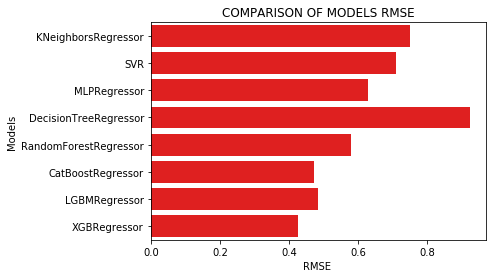

In [218]:
import seaborn as sns
sonuc = []

sonuclar = pd.DataFrame(columns= ["Models","RMSE"])

for model in modeller:
    isimler = model.__class__.__name__
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))    
    sonuc = pd.DataFrame([[isimler, rmse]], columns= ["Models","RMSE"])
    sonuclar = sonuclar.append(sonuc)
    
    
sns.barplot(x= 'RMSE', y = 'Models', data=sonuclar, color="r")
plt.xlabel('RMSE ')
plt.title('COMPARISON OF MODELS RMSE');    